In [2]:
import numpy as np
import matplotlib.pylab as plt
import uproot
import awkward as ak
import seaborn
import RA_funcs as rf
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.special import gamma
from scipy.stats import skew
import Scope_funcs as sf


<span style="font-family: arial; font-size:25px; color:pink">

Open ROOT file and extract data

In [3]:
run_number = 1080

hit_data = rf.get_ROOT_data_zip_RECO(run_number)

# print(len(hit_data))
# plane_7 = hit_data[hit_data.plane == 7]
# mask = ak.num(plane_7) == 1
# first_plane_starting_events = hit_data[mask]
# print(len(first_plane_starting_events))

1080 RECONSTRUCTED finished


<span style="font-family: arial; font-size:25px; color:pink">

Hit Counts and Amp in Single Planes

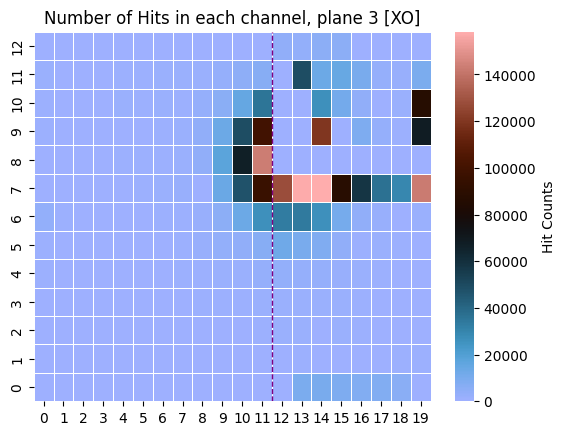

In [4]:
rf.hits_amount_colormap_single_plane(hit_data, 3)

<span style="font-family: arial; font-size:25px; color:pink">

Shower Evolution Throughout the Sensor

In [4]:
# rf.single_event_evolution_amp(hit_data, 441166, cmap="managua")

In [5]:
# plt.clf()   # Clear the current figure
# plt.close() # Close any open figures
# %matplotlib widget
# rf.amp_histo_single_plane(hit_data_1101,1)

In [2]:
# rf.amp_histo_single_plane_total_event(hit_data,1)

In [1]:
# rf.average_amp_vs_plane(hit_data)

In [8]:
# rf.plot_empty_first_planes(hit_data)

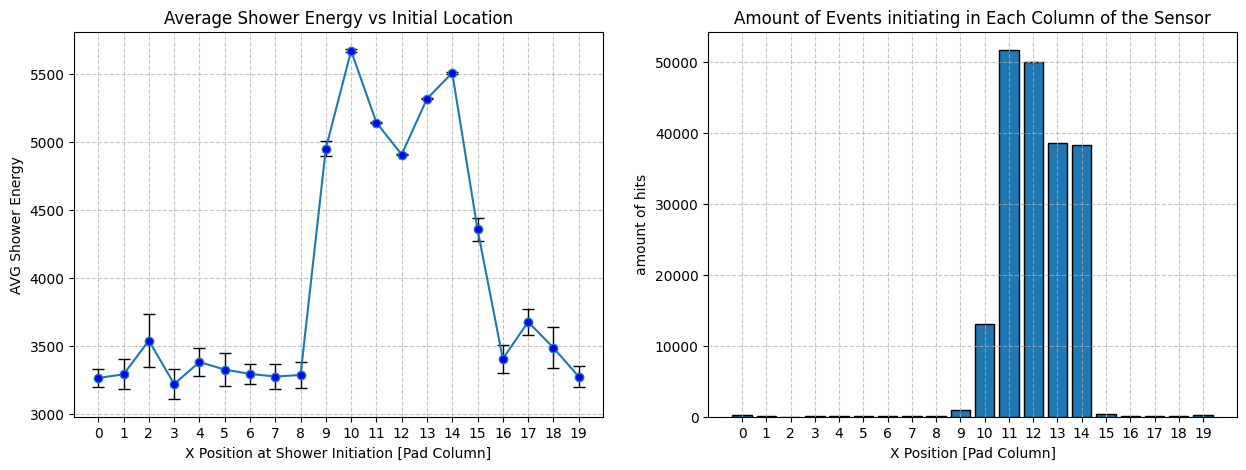

In [18]:
rf.event_shower_energy_vs_X_position(hit_data)

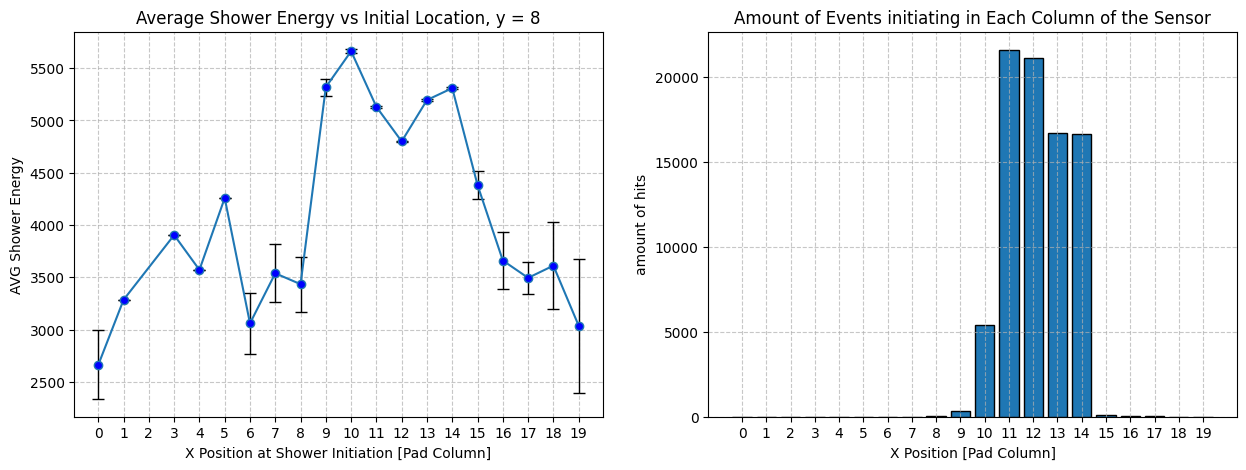

In [20]:
rf.event_shower_energy_vs_X_position(hit_data, specific_Y=8)

In [3]:
# rf.Histo_shower_energy_for_X_position(hit_data, 5, single_pad_only = "true")

In [4]:
# hit_data_with_distances = rf.Radii_from_Initial_position(hit_data)
# rf.frac_energy_radii_histo(hit_data_with_distances, 0.95)

In [5]:
# hit_data_with_distances = rf.Radii_from_Initial_position(hit_data)
# rf.frac_energy_radii_histo(hit_data_with_distances, 0.9)

In [3]:
data_scope = sf.DUT_TELE_merge(1080)

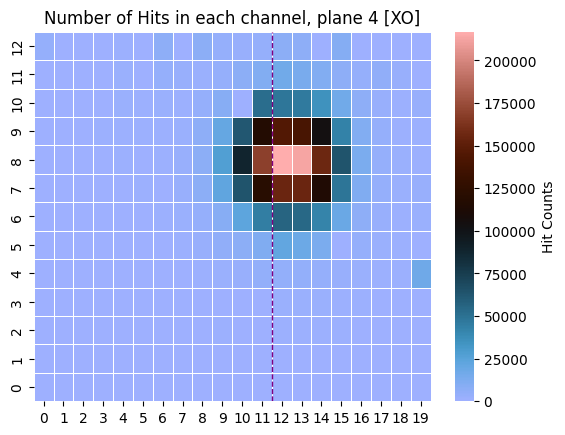

In [12]:
rf.hits_amount_colormap_single_plane(data_scope.hits, 4)

In [8]:
path = "TB_FIRE\TB_reco\TB_FIRE_1080_raw_reco_diagnostics.root"
a = rf.reconstruct_data_all_dead_pads(data_scope,7,path)

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\bents\AppData\Local\Temp\ipykernel_5072\3016993198.py:1: SyntaxWarning: invalid escape sequence '\T'
  path = "TB_FIRE\TB_reco\TB_FIRE_1080_raw_reco_diagnostics.root"


shower center: 171
we got the data
amount of dead channels: 139
{plane_ID: 1, channel_ID: 77}
81 channels left
{plane_ID: 1, channel_ID: 133}
80 channels left
{plane_ID: 1, channel_ID: 255}
79 channels left
{plane_ID: 2, channel_ID: 24}
78 channels left
{plane_ID: 2, channel_ID: 50}
77 channels left
{plane_ID: 2, channel_ID: 54}
76 channels left
{plane_ID: 2, channel_ID: 67}
75 channels left
{plane_ID: 2, channel_ID: 77}
74 channels left
{plane_ID: 2, channel_ID: 138}
73 channels left
{plane_ID: 2, channel_ID: 144}
72 channels left
{plane_ID: 2, channel_ID: 148}
71 channels left
{plane_ID: 2, channel_ID: 172}
70 channels left
{plane_ID: 2, channel_ID: 173}
69 channels left
{plane_ID: 2, channel_ID: 174}
68 channels left
{plane_ID: 2, channel_ID: 175}
67 channels left
{plane_ID: 2, channel_ID: 176}
66 channels left
{plane_ID: 2, channel_ID: 178}
65 channels left
{plane_ID: 2, channel_ID: 192}
64 channels left
{plane_ID: 2, channel_ID: 193}
63 channels left
{plane_ID: 2, channel_ID: 195}

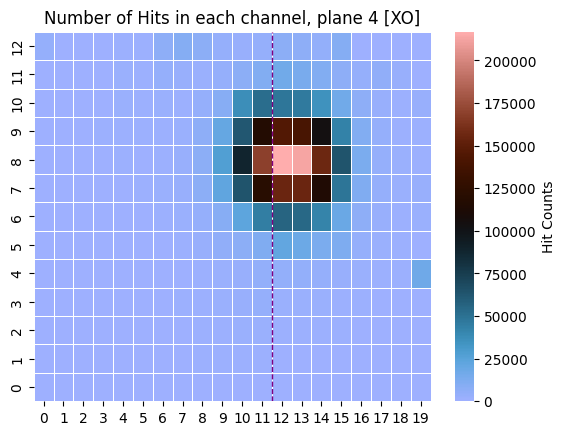

In [13]:
rf.hits_amount_colormap_single_plane(a.hits, 4)

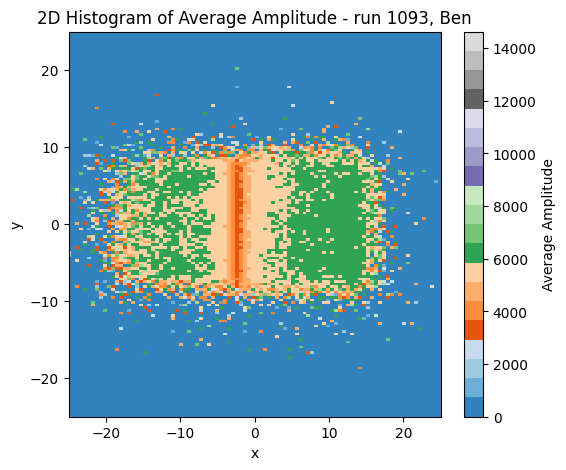

In [16]:
sf.avg_energy_scope_colormap(a, x_borders=25, y_borders=25)

[4.9e+03, 5.44e+03, 5.53e+03, 8.01e+03, ..., 6.03e+03, 4.16e+03, 2.79e+03]
Gaussian fit parameters:
c     = 5901.176
m     = 2.766
theta     = 1.224 Radians
A     = 2438.878
mu    = -2.264
sigma = 1.032
(np.float64(5859.68223296012), np.float64(6316.108918694756))


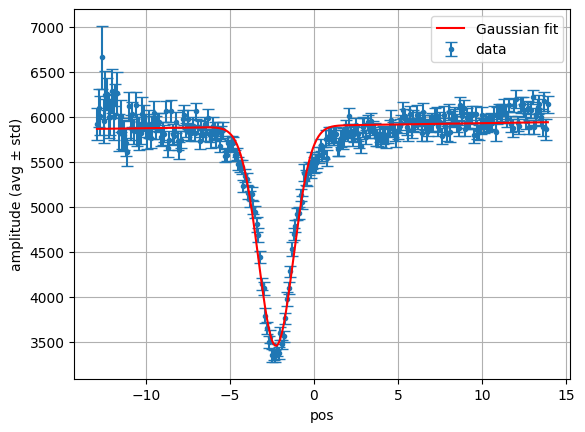

In [28]:
sf.E_vs_X_scope_gaussian_fit(a, 0.5, -10, 10, -13, 14)

In [ ]:
# colormap of the average showeer energy for its scope position
def avg_energy_scope_colormap(data, x_borders="false", y_borders="false", cmap="tab20c", bins=300):

    X_scope1 = ak.flatten(data.tele.x)
    Y_scope1 = ak.flatten(data.tele.y)

    X_scope = -ak.to_numpy(X_scope1)
    Y_scope = ak.to_numpy(Y_scope1)

    amp1 = ak.sum(data.hits.amp, axis = 1)
    amp = ak.to_numpy(amp1)

    # Histogram of SUM of amplitudes
    sum_amp, xedges, yedges = np.histogram2d(X_scope, Y_scope, bins=bins, weights=amp)

    # Histogram of COUNTS
    counts, _, _ = np.histogram2d(X_scope, Y_scope, bins=[xedges, yedges])

    # Avoid division by zero
    avg_amp = np.divide(sum_amp, counts, out=np.zeros_like(sum_amp), where=counts > 0)

    # Plot
    plt.figure(figsize=(6,5))
    plt.pcolormesh(xedges, yedges, avg_amp.T, cmap="tab20c")  
    plt.colorbar(label="Average Amplitude")
    plt.xlim(min(X_scope), max(X_scope))
    plt.ylim(min(Y_scope), max(Y_scope))
    
    if x_borders != "false":
        plt.xlim(-x_borders, x_borders)
    if y_borders != "false":
        plt.ylim(-y_borders, y_borders)
    
    plt.xlabel("x [mm]")
    plt.ylabel("y [mm]")
    plt.title("Average Shower Energy per Position")
    plt.show()
